Test 1: plot secant curve to visualize root finding

4499626.025702862 4499563.169479499
4499626.025702863 4499563.169479498
4499626.025702862 4499563.169479498
4499626.025702863 4499563.169479497
4499626.025702863 4499563.169479496
4499626.025702863 4499563.169479496
4499626.025702863 4499563.169479495
4499626.025702863 4499563.169479494
4499626.025702863 4499563.169479493
4499626.025702863 4499563.169479492
4499626.025702863 4499563.169479492
4499626.025702863 4499563.16947949
4499626.025702863 4499563.16947949
4499626.025702863 4499563.169479489
4499626.025702864 4499563.169479489
4499626.025702864 4499563.169479488
4499626.025702864 4499563.169479487
4499626.025702864 4499563.1694794865
4499626.025702864 4499563.1694794865
4499626.025702864 4499563.169479486
4499626.025702864 4499563.169479485
4499626.025702864 4499563.169479485
4499626.025702864 4499563.169479483
4499626.025702864 4499563.169479483
4499626.025702865 4499563.169479482
4499626.025702865 4499563.169479482
4499626.025702864 4499563.169479481
4499626.025702865 4499563.16

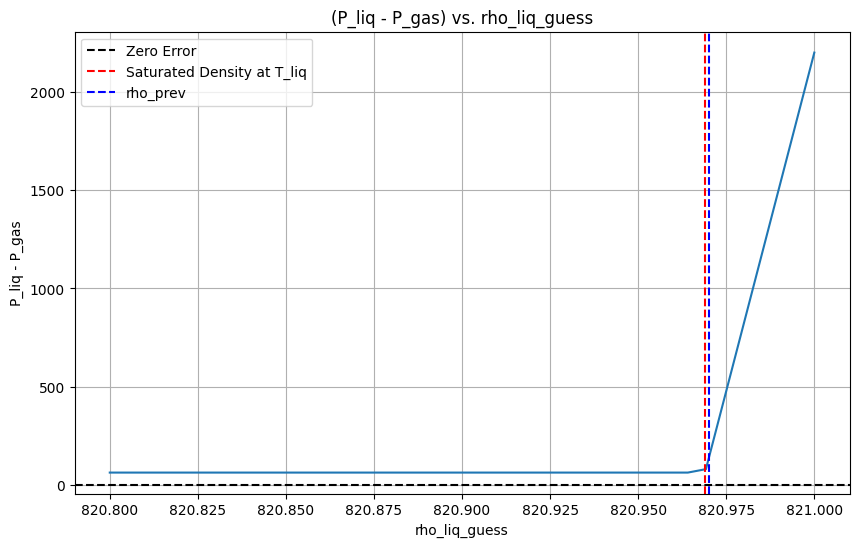

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP


def secant(func, x1):
    x_eps = x1 * 0.005  # Set the tolerance to be 0.5% of init guess
    x2 = x1 -x1 * 0.01  # Set a second point 1% away from the original guess
    F1 = func(x1)  # sol function at x1
    F2 = func(x2)  # sol function at x2
    kk = 1  # Set up counter
    kk_max = 1000

    while np.abs(x2 - x1) >= (x_eps) and kk < kk_max:  # While error is too large and counter is less than max
        x3 = x2 - (F2 * (x2 - x1) / (F2 - F1)) 
        x1 = x2  # Move everything forward
        x2 = x3
        F1 = F2
        F2 = func(x2) 
        if (F1 == F2):
            return x2
        kk = kk + 1
    x = x2
    return x



def P_tank_error(rho_liq_guess, T_liq, T_gas, m_liq, m_gas, V_tank):
    #print("rho_liq: ", rho_liq_guess)

    P_liq_est = CP.PropsSI('P', 'D', rho_liq_guess, 'T', T_liq, 'N2O')

    rho_gas_est = m_gas / (V_tank - (m_liq/rho_liq_guess) ) ### I THINK I NEED MORE LOGIC HERE TO MAKE SURE WE NEVER GET A m_liq/rho_liq_guess > V_tank

    P_gas_est = CP.PropsSI('P', 'D', rho_gas_est, 'T', T_gas, 'N2O')

    #print("P error: ", P_liq_est - P_gas_est)

    V_liq = (m_liq/rho_liq_guess)
    V_gas = (m_gas/rho_gas_est)

    #print("Node Volumes: ", V_liq, V_gas, "Volume constraint: ", V_tank - (V_liq + V_gas))

    #print("Pressures at liq / gas node: ", P_liq_est, P_gas_est, P_liq_est-P_gas_est)

    #liq_phase = CP.PhaseSI('T', T_liq, 'P', P_liq_est, 'N2O')
    #gas_phase = CP.PhaseSI('T', T_gas, 'P', P_gas_est, 'N2O')
    #print("densities: (liq, gas): ", rho_liq_guess, P_liq_est, liq_phase, rho_gas_est, P_gas_est, gas_phase)

    print(P_liq_est, P_gas_est)

    return P_liq_est - P_gas_est


"""
def solve_thermo_params(T_liq, T_gas, m_liq, m_gas, rho_liq_prev, V_tank, P_tank_err_tolerance):

    rho_liq = rho_liq_prev #initial guess for rho_liq

    #print("rho_liq_prev: ", rho_liq_prev)

    while np.abs(P_tank_error(rho_liq, T_liq, T_gas, m_liq, m_gas, V_tank) ) > P_tank_err_tolerance:
        rho_liq = secant((lambda P: P_tank_error(P, T_liq, T_gas, m_liq, m_gas, V_tank)), rho_liq)

    P_tank = CP.PropsSI('P', 'D', rho_liq, 'T', T_liq, 'N2O')

    rho_gas = m_gas / (V_tank - (m_liq/rho_liq) )

    return rho_liq, rho_gas, P_tank
"""

### initial conditions
P_tank = 43e5 #Pa
T_liq = CP.PropsSI('T', 'P', P_tank, 'Q', 0, 'N2O') + 0.003 # K         # Perterb to start off of saturation curve
T_gas = CP.PropsSI('T', 'P', P_tank, 'Q', 1, 'N2O') - 0.003 # K
m_liq = 18.231680203303263    # kg
m_gas = 1.7683197966967383    # kg
rho_liq_prev =  820.970209097243  # kg/m^3
V_tank = 0.0354 #m^3
P_tank_err_tolerance = 100.0  # Pa
rho_prev = 820.970209097243
rho_sat = CP.PropsSI('D', 'P', P_tank, 'Q', 0, 'N2O')


### initial conditions
T_liq = 288.11101589488993
T_gas = 288.1104168948341
m_liq = 18.230742703303267
m_gas = 1.7683197966967383
rho_sat = CP.PropsSI('D', 'T', T_liq, 'Q', 0, 'N2O')
rho_prev = 820.970209097243
V_tank = 0.0354
P_tank_err_tolerance = 200
lower_bound = 819.970209097243
upper_bound = 821.970209097243




# Wrapper for plotting
def P_err_wrapper(rho):
    P_err = -1e7

    try:
        P_err = P_tank_error(rho, T_liq, T_gas, m_liq, m_gas, V_tank)
    except Exception as e:
        print(f"Skipped rho = {rho:.2f}: {e}")

    return P_err


# Plot over a range of rho_liq guesses
rho_range = np.linspace(820.8, 821, 40)
errors = [P_err_wrapper(rho) for rho in rho_range]



plt.figure(figsize=(10, 6))
plt.plot(rho_range, errors)
plt.axhline(0, color='k', linestyle='--', label='Zero Error')
plt.axvline(rho_sat, color='r', linestyle='--', label='Saturated Density at T_liq')
plt.axvline(rho_prev, color='b', linestyle='--', label='rho_prev')
plt.xlabel('rho_liq_guess')
plt.ylabel('P_liq - P_gas')
plt.title('(P_liq - P_gas) vs. rho_liq_guess')
plt.legend()
plt.grid(True)



Observe the horizontal line before the graph crosses the X axis. This can be explained by the inputs to COOLPROP resulting in properties from the saturated region. This can be explained because the pressure error is constant here, and the pressures of saturated liquids and saturated gases are constant. The reason why we see an error (difference in pressure off the x axis) is because T_liq and T_gas are slightly different. 

I believe the issue is that we are experiencing metastable states SEE [16] which coolprop is not capable of handling, so we need to go back to the SWEOS implementation. At least at this stage we built significant confidence in the 1D secant for solving thermo properites.

I will continue by adding features so I can have a thermodynamically closed model that uses SWEOS for all thermo properties. This will include adding and testing my SWEOS more, especially enthalpy and saturated properties.

Failed at T = 280.34 K: Initial guess is outside of provided bounds
Failed at T = 282.59 K: Initial guess is outside of provided bounds
Failed at T = 284.83 K: Initial guess is outside of provided bounds
Failed at T = 287.07 K: Initial guess is outside of provided bounds
Failed at T = 289.31 K: Initial guess is outside of provided bounds
Failed at T = 291.55 K: Initial guess is outside of provided bounds
Failed at T = 293.79 K: Initial guess is outside of provided bounds
Failed at T = 296.03 K: Initial guess is outside of provided bounds
Failed at T = 298.28 K: Initial guess is outside of provided bounds
Failed at T = 300.52 K: Initial guess is outside of provided bounds
Failed at T = 302.76 K: Initial guess is outside of provided bounds
Failed at T = 305.00 K: Initial guess is outside of provided bounds


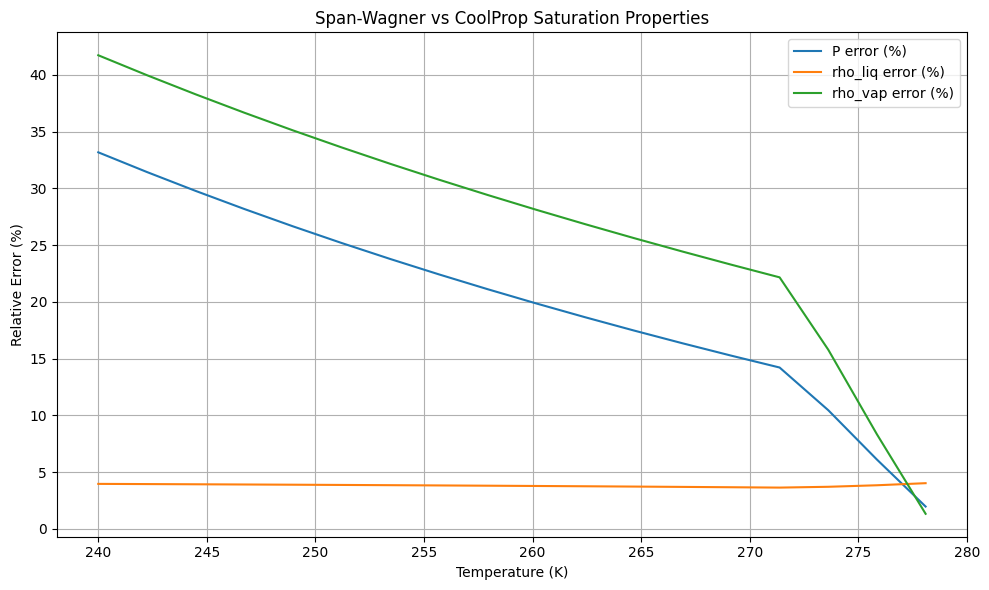

In [1]:
import numpy as np
import CoolProp.CoolProp as CP
from scipy.optimize import fsolve, least_squares, root_scalar
import matplotlib.pyplot as plt

class sweos_nos:
    def __init__(self):

        # Constants for N2O
        self.R = 8.3144598 / 44.0128 * 1000 # Gas constant (kJ/kg*K)
        self.T_c = 309.52  # Critical Temperature (K)
        self.rho_c = 452.0115  # Critical Density (kg/m^3)

        self.n0 = np.array([0.88045, -2.4235, 0.38237, 0.068917, 0.00020367, 0.13122, 0.46032,
            -0.0036985, -0.23263, -0.00042859, -0.042810, -0.023038])
        self.n1 = self.n0[0:5]
        self.n2 = self.n0[5:12]
        self.a1 = 10.7927224829
        self.a2 = -8.2418318753
        self.c0 = 3.5
        self.v0 = np.array([2.1769, 1.6145, 0.48393])
        self.u0 = np.array([879, 2372, 5447])
        self.t0 = np.array([0.25, 1.125, 1.5, 0.25, 0.875, 2.375, 2, 2.125, 3.5, 6.5, 4.75, 12.5])
        self.d0 = np.array([1, 1, 1, 3, 7, 1, 2, 5, 1, 1, 4, 2])
        self.P0 = np.array([1, 1, 1, 2, 2, 2, 3])
        self.t1 = self.t0[0:5]
        self.t2 = self.t0[5:12]
        self.d1 = self.d0[0:5]
        self.d2 = self.d0[5:12]

    def sol(self, rho, T, param):
        # Calculate non-dimensional variables
        tau = self.T_c / T
        delta = rho / self.rho_c

        # Calculate explicit Helmholtz energy and derivatives
        ao = self.a1 + self.a2 * tau + np.log(delta) + (self.c0 - 1) * np.log(tau) + np.sum(self.v0 * np.log(1 - np.exp(-self.u0 * tau / self.T_c)))
        ar = np.sum(self.n1 * tau**self.t1 * delta**self.d1) + np.sum(self.n2 * tau**self.t2 * delta**self.d2 * np.exp(-delta**self.P0))
        ao_tau = self.a2 + (self.c0 - 1) / tau + np.sum(self.v0 * self.u0 / self.T_c * np.exp(-self.u0 * tau / self.T_c) / (1 - np.exp(-self.u0 * tau / self.T_c)))
        ao_tautau = -(self.c0 - 1) / tau**2 + np.sum(-self.v0 * self.u0**2 / self.T_c**2 * np.exp(-self.u0 * tau / self.T_c) / (1 - np.exp(-self.u0 * tau / self.T_c))**2)
        ar_tau = np.sum(self.n1 * self.t1 * tau**(self.t1 - 1) * delta**self.d1) + np.sum(self.n2 * self.t2 * tau**(self.t2 - 1) * delta**self.d2 * np.exp(-delta**self.P0))
        ar_tautau = np.sum(self.n1 * self.t1 * (self.t1 - 1) * tau**(self.t1 - 2) * delta**self.d1) + np.sum(self.n2 * self.t2 * (self.t2 - 2) * tau**(self.t2 - 2) * delta**self.d2 * np.exp(-delta**self.P0))
        ar_delta = np.sum(self.n1 * self.d1 * delta**(self.d1 - 1) * tau**self.t1) + np.sum(self.n2 * tau**self.t2 * delta**(self.d2 - 1) * (self.d2 - self.P0 * delta**self.P0) * np.exp(-delta**self.P0))
        ar_deltadelta = np.sum(self.n1 * self.d1 * (self.d1 - 1) * delta**(self.d1 - 2) * tau**self.t1) + np.sum(self.n2 * tau**self.t2 * delta**(self.d2 - 2) * ((self.d2 - self.P0 * delta**self.P0) * (self.d2 - 1 - self.P0 * delta**self.P0) - self.P0**2 * delta**self.P0) * np.exp(-delta**self.P0))
        ar_deltatau = np.sum(self.n1 * self.d1 * self.t1 * delta**(self.d1 - 1) * tau**(self.t1 - 1)) + np.sum(self.n2 * self.t2 * tau**(self.t2 - 1) * delta**(self.d2 - 1) * (self.d2 - self.P0 * delta**self.P0) * np.exp(-delta**self.P0))

        out = 0.0

        if param == 'p':  # Pressure (Pa)
            out = rho * self.R * T * (1 + delta * ar_delta)
        elif param == 'u':  # Specific internal energy (J/kg)
            out = self.R * T * tau * (ao_tau + ar_tau)
        elif param == 's':  # Specific entropy (J/kg*K)
            out = self.R * (tau * (ao_tau + ar_tau) - ao - ar)
        elif param == 'h':  # Specific enthalpy (J/kg)
            out = self.R * T * (1 + tau * (ao_tau + ar_tau) + delta * ar_delta)
        elif param == 'cv':  # Specific heat constant volume (J/kg*K)
            out = self.R * -tau**2 * (ao_tautau + ar_tautau)
        elif param == 'cp':  # Specific heat constant pressure (J/kg*K)
            out = self.R * (-tau**2 * (ao_tautau + ar_tautau) + (1 + delta * ar_delta - delta * tau * ar_deltatau)**2 / (1 + 2 * delta * ar_delta + delta**2 * ar_deltadelta))
        elif param == 'du_drho_const_T': # 
            out = self.R * T / rho * ( tau * delta * ar_deltatau)
        elif param == 'dP_dT_const_rho':
            out = rho * self.R *(1 + delta * ar_delta - (tau * delta *ar_deltatau) )
        elif param == 'dP_drho_const_T':
            out = self.R * T * (1 + 2 * delta * ar_delta + (delta**2) * ar_deltadelta )
        elif param == 'd_rho_dT_const_P':
            out = (rho * self.R *(1 + delta * ar_delta - (tau * delta *ar_deltatau) )) / (self.R * T * (1 + 2 * delta * ar_delta + (delta**2) * ar_deltadelta ))
        else:
            raise NotImplementedError(f'{param} is not implemented or incorrectly entered, see thermo_span_wagner()')

        return out
    
    def gibbs(self, rho, T):
        h = self.sol(rho, T, 'h')
        s = self.sol(rho, T, 's')
        return h - T * s

    
    def saturation_given_T(self, T):
        """
        Finds saturation pressure and densities at a given temperature T using Maxwell construction.
        Returns: P_sat, rho_liq, rho_vap
        """
        def objective(rhos):
            rho_l, rho_v = rhos

            # Enforce physical density limits
            if not (100 < rho_l < 1300 and 0.1 < rho_v < 100):
                return [1e6, 1e6]

            try:
                g_l = self.gibbs(rho_l, T)
                g_v = self.gibbs(rho_v, T)
                p_l = self.sol(rho_l, T, 'p')
                p_v = self.sol(rho_v, T, 'p')
                return [g_l - g_v, p_l - p_v]
            except:
                return [1e6, 1e6]  # Avoid solver crash on bad EOS values

        # Try CoolProp for guesses, fallback if not available
        try:
            rho_l0 = CP.PropsSI('D', 'T', T, 'Q', 0, 'N2O')
            rho_v0 = CP.PropsSI('D', 'T', T, 'Q', 1, 'N2O')
        except:
            rho_l0 = 750
            rho_v0 = 5

        result = least_squares(
            objective,
            [rho_l0, rho_v0],
            bounds=([100, 0.1], [1300, 100]),
            xtol=1e-10,
            ftol=1e-10
        )

        if not result.success:
            raise RuntimeError("saturation_given_T: solver failed to converge")

        rho_liq, rho_vap = result.x
        P_sat = self.sol(rho_liq, T, 'p')  # p_liq == p_vap

        return P_sat, rho_liq, rho_vap


    def saturation_given_P(self, P_target):
        """
        Finds saturation temperature and densities at a given pressure P using root finding.
        Returns: T_sat, rho_liq, rho_vap
        """
        def objective(T):
            try:
                P_sat, _, _ = self.saturation_given_T(T)
                return P_sat - P_target
            except:
                return 1e6  # Return large number to skip bad region

        # Reasonable bracketing for nitrous oxide
        result = root_scalar(objective, bracket=[180, self.T_c - 0.01], method='brentq')

        if not result.converged:
            raise RuntimeError("saturation_given_P: could not find T_sat")

        T_sat = result.root
        _, rho_liq, rho_vap = self.saturation_given_T(T_sat)

        return T_sat, rho_liq, rho_vap
        

eos = sweos_nos()

T_vals = np.linspace(240, 305, 30)
errors = {
    'T': [],
    'P_err_%': [],
    'rho_l_err_%': [],
    'rho_v_err_%': []
}

P_sw_list = []
P_cp_list = []
rho_l_sw_list = []
rho_l_cp_list = []
rho_v_sw_list = []
rho_v_cp_list = []

for T in T_vals:
    try:
        P_sw, rho_l_sw, rho_v_sw = eos.saturation_given_T(T)
        P_cp = CP.PropsSI('P', 'T', T, 'Q', 0, 'N2O')
        rho_l_cp = CP.PropsSI('D', 'T', T, 'Q', 0, 'N2O')
        rho_v_cp = CP.PropsSI('D', 'T', T, 'Q', 1, 'N2O')

        P_err = 100 * abs(P_sw - P_cp) / P_cp
        rho_l_err = 100 * abs(rho_l_sw - rho_l_cp) / rho_l_cp
        rho_v_err = 100 * abs(rho_v_sw - rho_v_cp) / rho_v_cp

        errors['T'].append(T)
        errors['P_err_%'].append(P_err)
        errors['rho_l_err_%'].append(rho_l_err)
        errors['rho_v_err_%'].append(rho_v_err)

    except Exception as e:
        print(f"Failed at T = {T:.2f} K: {e}")

# Convert to array for plotting
T = np.array(errors['T'])
P_err = np.array(errors['P_err_%'])
rho_l_err = np.array(errors['rho_l_err_%'])
rho_v_err = np.array(errors['rho_v_err_%'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T, P_err, label='P error (%)')
plt.plot(T, rho_l_err, label='rho_liq error (%)')
plt.plot(T, rho_v_err, label='rho_vap error (%)')
plt.xlabel('Temperature (K)')
plt.ylabel('Relative Error (%)')
plt.title('Span-Wagner vs CoolProp Saturation Properties')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Check teqp

In [88]:
import teqp, numpy as np
teqp.__version__

model = teqp.build_multifluid_model(["NitrousOxide"],teqp.get_datapath() )
anc = model.build_ancillaries()
T = 275 # [K]
rhoL, rhoV = anc.rhoL(T), anc.rhoV(T)
print('Densities are:', rhoL/44.01, rhoV/44.01, 'kg/m^3')


Niter = 10
rhoLtrue, rhoVtrue = model.pure_VLE_T(T, rhoL, rhoV, Niter)
print('VLE densities are:', rhoLtrue/44.01, rhoVtrue/44.01, 'kg/m^3')

print(model)




Densities are: 464.4214226662984 46.51370895146403 kg/m^3
VLE densities are: 463.36339379738473 46.45070404968714 kg/m^3
